# import pakage

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load image

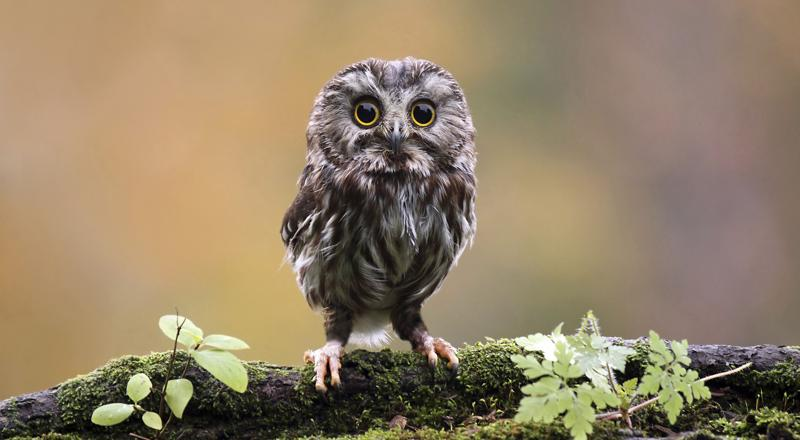

In [4]:
image_path = "./Figure/owl.jpg"

img = Image.open(image_path)
img

In [5]:
# img to numpy array
img_arr = np.array(img)

In [6]:
# split color channel (RGB)
r,g,b = img_arr[:,:,0].flatten(),img_arr[:,:,1].flatten(),img_arr[:,:,2].flatten()
clr = np.stack([r,g,b],axis=1)/255

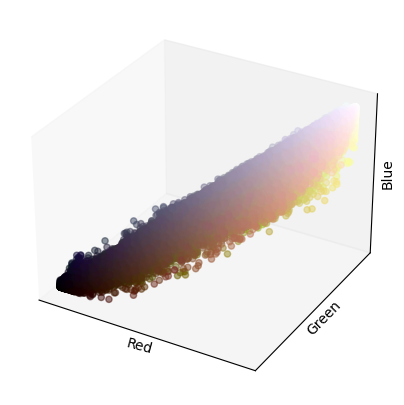

In [7]:
# plot Color Diagram
fig = plt.figure(figsize = (5, 5))

ax = plt.axes(projection='3d')

ax.scatter3D(r,g,b, c= clr, alpha=0.5)

# Get rid of the ticks
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Add the labels
ax.set_xlabel('Red' ,rotation=-15)
ax.set_ylabel('Green')
ax.set_zlabel('Blue',rotation=90)

ax.yaxis.labelpad=-15
ax.xaxis.labelpad=-15
ax.zaxis.labelpad=-15

plt.show()

# make K-Means model

In [8]:
from sklearn.cluster import KMeans

In [9]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")

In [10]:
x = np.stack([r,g,b],axis=1)
x.shape

(352000, 3)

## fit model

In [11]:
kmeans.fit(x)

KMeans(n_clusters=20, n_init='auto', random_state=42)

## plot result

In [12]:
# Cluster centers
cluster_centers = kmeans.cluster_centers_
clr_center = np.uint8(cluster_centers)
clr_center

array([[142, 123, 117],
       [ 15,  14,   9],
       [189, 159, 122],
       [239, 237, 224],
       [ 67,  63,  50],
       [151, 136, 111],
       [216, 213, 194],
       [ 32,  29,  21],
       [166, 139,  93],
       [131, 119, 100],
       [ 87,  82,  67],
       [161, 151, 150],
       [196, 203, 149],
       [175, 186, 119],
       [176, 151, 113],
       [ 49,  46,  34],
       [194, 164, 110],
       [106, 100,  88],
       [189, 178, 177],
       [203, 166, 119]], dtype=uint8)

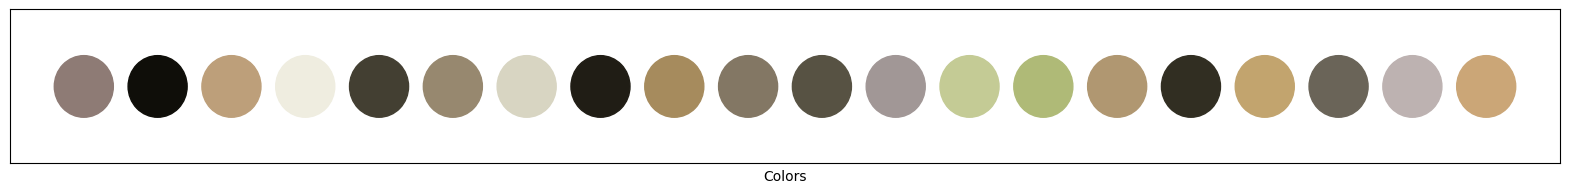

In [13]:
# Color display of cluster centers

fig, ax = plt.subplots(figsize=(clr_center.shape[0],2))
for i,clr_c in enumerate(clr_center):
    ax.add_patch(plt.Circle((i, 0),0.4, color=clr_c/255))
    
    
ax.set_xlim([-1, i+1])
ax.set_ylim([-1,1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax.set_xlabel("Colors")
plt.show()

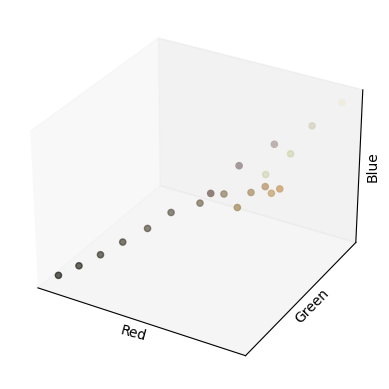

In [14]:
# Color display of cluster centers
fig = plt.figure()
fig.clf()
ax = plt.axes(projection='3d')

rr,gg,bb = clr_center[:,0],clr_center[:,1],clr_center[:,2]

ax.scatter3D(rr,gg,bb, c= clr_center/255, s = 20)

# Get rid of the ticks
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Add the labels
ax.set_xlabel('Red' ,rotation=-15)
ax.set_ylabel('Green')
ax.set_zlabel('Blue',rotation=90)
ax.yaxis.labelpad=-15
ax.xaxis.labelpad=-15
ax.zaxis.labelpad=-15

plt.show()

## predict

In [15]:
y = kmeans.predict(x)

## New figure drawing.

In [16]:
new_arr = []
for plx in y:
    new_arr.append(clr_center[plx])
new_arr = np.array(new_arr)

In [17]:
new_arr.shape

(352000, 3)

In [18]:
new_arr = new_arr.reshape(img_arr.shape)

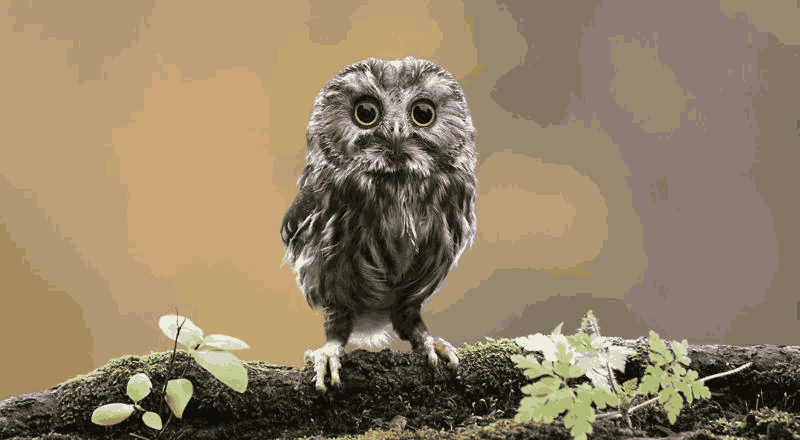

In [19]:
new_img = Image.fromarray(new_arr)
new_img

In [20]:
new_img.save("./Figure/Color clustering.jpg")